<a href="http://laf-fabric.readthedocs.org/en/latest/" target="_blank"><img align="left" src="images/laf-fabric-small.png"/></a>
<a href="https://shebanq.ancient-data.org" target="_blank"><img align="left"src="images/shebanq_logo_small.png"/></a>
<a href="http://dx.doi.org/10.17026/dans-z6y-skyh" target="_blank"><img align="left"src="images/DANS-logo_small.png"/></a>
<a href="https://www.dbg.de/index.php?L=1" target="_blank"><img align="right" src="images/DBG-small.png"/></a>
<a href="http://www.godgeleerdheid.vu.nl/etcbc" target="_blank"><img align="right" src="images/VU-ETCBC-small.png"/></a>

# Workshop 2016-03-14

# 1. Datamodel: 

## 1.1 ETCBC data in the Emdros model

See the [otype](https://shebanq.ancient-data.org/shebanq/static/docs/featuredoc/features/comments/otype.html) feature.

And then the [overview](https://shebanq.ancient-data.org/shebanq/static/docs/featuredoc/features/comments/0_overview.html) of features.

[SHEBANQ](https://shebanq.ancient-data.org) is your friend, especially the **Help** there.

## 1.2 Let's go LAF

<a href="http://laf-fabric.readthedocs.org/en/latest/" target="_blank"><img align="left" src="images/LAF.png"/></a>

## 1.3 Let's forget LAF

**LAF-Fabric**
* has read all the LAF-XML
* has built a datastructure (graph)
* has saved the data structure on disk
* will load the relevant parts for you quickly

# 2. API

We'll start the API, but first we have to import the necessary modules.
``sys, collections, re`` are not necessary for LAF-Fabric, but may come in handy later.

In [1]:
import sys, collections, re

from laf.fabric import LafFabric
from etcbc.preprocess import prepare
fabric = LafFabric()

  0.00s This is LAF-Fabric 4.8.3
API reference: http://laf-fabric.readthedocs.org/en/latest/texts/API-reference.html
Feature doc: https://shebanq.ancient-data.org/static/docs/featuredoc/texts/welcome.html



`LafFabric` is a class offered by the `laf.fabric` module, and have created just one object of that class, and stored it in the variable `fabric`.

Note the links to the documentation.

LAF-Fabric can work with several data sources and versions.

In [2]:
source='etcbc'
version='4b'

## 2.1 Loading data

The `load` method is a function that listens to your data requirements, and manages to keep in memory exactly what you need.

In [3]:
API=fabric.load(source+version, 'lexicon', 'workshop', {
    "xmlids": {"node": False, "edge": False},
    "features": ('''
        otype
        lex g_word
        sp pdp nametype ls gloss language code
        chapter verse
    ''','mother'),
    "prepare": prepare,
    "primary": False,
}, verbose='DETAIL')
exec(fabric.localnames.format(var='fabric'))

  0.00s LOADING API: please wait ... 
  0.00s DETAIL: COMPILING m: etcbc4b: UP TO DATE
  0.00s USING main: etcbc4b DATA COMPILED AT: 2015-11-02T15-08-56
  0.00s DETAIL: COMPILING a: lexicon: UP TO DATE
  0.00s USING annox: lexicon DATA COMPILED AT: 2016-07-08T14-32-54
  0.01s DETAIL: load main: G.node_anchor_min
  0.06s DETAIL: load main: G.node_anchor_max
  0.14s DETAIL: load main: G.node_sort
  0.21s DETAIL: load main: G.node_sort_inv
  0.60s DETAIL: load main: G.edges_from
  0.65s DETAIL: load main: G.edges_to
  0.72s DETAIL: load main: F.etcbc4_db_otype [node] 
  1.29s DETAIL: load main: F.etcbc4_ft_code [node] 
  1.34s DETAIL: load main: F.etcbc4_ft_g_word [node] 
  1.54s DETAIL: load main: F.etcbc4_ft_language [node] 
  1.72s DETAIL: load main: F.etcbc4_ft_lex [node] 
  1.88s DETAIL: load main: F.etcbc4_ft_ls [node] 
  2.06s DETAIL: load main: F.etcbc4_ft_pdp [node] 
  2.23s DETAIL: load main: F.etcbc4_ft_sp [node] 
  2.40s DETAIL: load main: F.etcbc4_sft_chapter [node] 
  2.41s 

In [7]:
T.text(book='Genesis', chapter=1, verse="1", fmt="ha", html=False, otype="word")

    34s fmt and otype parameters exclude each other. Ignoring otype="None"


'Genesis 1:1\tבְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃\n'

In [4]:
v = list(F.otype.s('verse'))[0]
L.d('word', v)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## 2.2 ETCBC additions

The `laf` modules know nothing about Hebrew data, nor about ETCBC data features.

The `etcbc` modules bring in specific knowledge about how the ETCBC data has been modeled in LAF. It knows
* it knows that *sentences* contain *clauses* contain *phrases*
* it can order all nodes in a logical order
* it can find parts and wholes
* it can print text content

# 3. Tasks

## 3.1 Exploration

### 3.1.1 Show the first 20 nodes

In [4]:
i = 0
for n in NN():
    print('{} {}'.format(n, F.otype.v(n)))
    i += 1
    if i >= 20: break

1367497 book
1367536 chapter
1413645 verse
1125793 sentence
1189379 sentence_atom
426568 clause
514579 clause_atom
1368465 half_verse
605133 phrase
858294 phrase_atom
0 word
1 word
605134 phrase
858295 phrase_atom
2 word
605135 phrase
858296 phrase_atom
3 word
1368466 half_verse
605136 phrase


### 3.1.2 Count all nodes

In [5]:
msg('Counting')

i = 0
for n in NN(): i += 1
print(i)

msg('Done. {} nodes'.format(i))

  6.20s Counting
  6.52s Done. 1436858 nodes


1436858


### 3.1.3 Count the nodes per object type

In [6]:
msg('Counting per object type')

counts = collections.Counter()
for n in NN(): counts[F.otype.v(n)] += 1

msg('Done. {} distinct object types'.format(len(counts)))

  8.88s Counting per object type
    11s Done. 12 distinct object types


But how many nodes per object type?

In [7]:
for tp in counts: print('{} has {} nodes'.format(tp, counts[tp]))

sentence_atom has 64354 nodes
phrase_atom has 267499 nodes
chapter has 929 nodes
book has 39 nodes
clause has 88011 nodes
sentence has 63586 nodes
verse has 23213 nodes
subphrase has 113764 nodes
half_verse has 45180 nodes
clause_atom has 90554 nodes
phrase has 253161 nodes
word has 426568 nodes


Now more pretty, sorted by most numerous:

In [8]:
for (tp, n) in sorted(counts.items(), key=lambda x: (-x[1], x[0])):
    print('{:<20}: {:>7} nodes'.format(tp, n))

word                :  426568 nodes
phrase_atom         :  267499 nodes
phrase              :  253161 nodes
subphrase           :  113764 nodes
clause_atom         :   90554 nodes
clause              :   88011 nodes
sentence_atom       :   64354 nodes
sentence            :   63586 nodes
half_verse          :   45180 nodes
verse               :   23213 nodes
chapter             :     929 nodes
book                :      39 nodes


## 3.2 Find a passage

In [9]:
# for convenience, we use swahili bible book names
my_node = T.node_of('Mwanzo', 1, 1, lang='sw')

print(my_node)

1413645


By the way, here are the avalaible languages:

In [10]:
T.langs

{'am': ('amharic', 'ኣማርኛ'),
 'ar': ('arabic', 'العَرَبِية'),
 'bn': ('bengali', 'বাংলা'),
 'da': ('danish', 'Dansk'),
 'de': ('german', 'Deutsch'),
 'el': ('greek', 'Ελληνικά'),
 'en': ('english', 'English'),
 'es': ('spanish', 'Español'),
 'fa': ('farsi', 'فارسی'),
 'fr': ('french', 'Français'),
 'he': ('hebrew', 'עברית'),
 'hi': ('hindi', 'हिन्दी'),
 'id': ('indonesian', 'Bahasa Indonesia'),
 'ja': ('japanese', '日本語'),
 'ko': ('korean', '한국어'),
 'la': ('latin', 'Latina'),
 'nl': ('dutch', 'Nederlands'),
 'pa': ('punjabi', 'ਪੰਜਾਬੀ'),
 'pt': ('portuguese', 'Português'),
 'ru': ('russian', 'Русский'),
 'sw': ('swahili', 'Kiswahili'),
 'syc': ('syriac', 'ܠܫܢܐ ܣܘܪܝܝܐ'),
 'tr': ('turkish', 'Türkçe'),
 'ur': ('urdu', 'اُردُو'),
 'yo': ('yoruba', 'èdè Yorùbá'),
 'zh': ('chinese', '中文')}

Now get the word nodes of that passage.

In [11]:
my_words = L.d('word', my_node)
print(my_words)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## 3.3 Print text

In [12]:
print(T.words(my_words))

בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃



We also can get it in other formats

In [13]:
print(T.words(my_words, fmt='hc'))

בראשית ברא אלהימ את השמימ ואת הארצ׃



Now get it in all available formats.

In [14]:
T.formats()

OrderedDict([('hp',
              ('hebrew primary',
               <function etcbc.text.Text.__init__.<locals>.<lambda>>)),
             ('ha',
              ('hebrew accent',
               <function etcbc.text.Text.__init__.<locals>.<lambda>>)),
             ('hv',
              ('hebrew vowel',
               <function etcbc.text.Text.__init__.<locals>.<lambda>>)),
             ('hc',
              ('hebrew cons',
               <function etcbc.text.Text.__init__.<locals>.<lambda>>)),
             ('ea',
              ('trans accent',
               <function etcbc.text.Text.__init__.<locals>.<lambda>>)),
             ('ev',
              ('trans vowel',
               <function etcbc.text.Text.__init__.<locals>.<lambda>>)),
             ('ec',
              ('trans cons',
               <function etcbc.text.Text.__init__.<locals>.<lambda>>)),
             ('pf',
              ('phono full',
               <function etcbc.text.Text.__init__.<locals>.<lambda>>)),
             ('ps',

In [15]:
for f in T.formats(): print('{}'.format(T.words(my_words, fmt=f)))

בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃

בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃

בְּרֵאשִׁית בָּרָא אֱלֹהִים אֵת הַשָּׁמַיִם וְאֵת הָאָרֶץ׃

בראשית ברא אלהימ את השמימ ואת הארצ׃

B.:R;>CI73JT B.@R@74> >:ELOHI92Jm >;71T HAC.@MA73JIm W:>;71T H@>@35REy00

B.:R;>CIJT B.@R@> >:ELOHIJm >;T HAC.@MAJIm W:>;T H@>@REy00

BR>#JT BR> >LHJM >T H#MJM W>T H>RY00

bᵊrēšˌîṯ bārˈā ʔᵉlōhˈîm ʔˌēṯ haššāmˌayim wᵊʔˌēṯ hāʔˈāreṣ .

brēšîṯ bårå ʔlōhîm ʔēṯ haššåmayim wʔēṯ håʔåreṣ .



With a bit more info

In [16]:
for (f, (desc, method)) in T.formats().items(): print('{}={} {}'.format(f, desc, T.words(my_words, fmt=f)))

hp=hebrew primary בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃

ha=hebrew accent בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃

hv=hebrew vowel בְּרֵאשִׁית בָּרָא אֱלֹהִים אֵת הַשָּׁמַיִם וְאֵת הָאָרֶץ׃

hc=hebrew cons בראשית ברא אלהימ את השמימ ואת הארצ׃

ea=trans accent B.:R;>CI73JT B.@R@74> >:ELOHI92Jm >;71T HAC.@MA73JIm W:>;71T H@>@35REy00

ev=trans vowel B.:R;>CIJT B.@R@> >:ELOHIJm >;T HAC.@MAJIm W:>;T H@>@REy00

ec=trans cons BR>#JT BR> >LHJM >T H#MJM W>T H>RY00

pf=phono full bᵊrēšˌîṯ bārˈā ʔᵉlōhˈîm ʔˌēṯ haššāmˌayim wᵊʔˌēṯ hāʔˈāreṣ .

ps=phono simple brēšîṯ bårå ʔlōhîm ʔēṯ haššåmayim wʔēṯ håʔåreṣ .



# 4. Advanced tasks

## 4.1 Adding annotations.

See notebook valence/flow_corr.

## 4.2 R

See notebooks shebanq/r

## 4.3 Edges

In [17]:
msg('collecting relationships')
mothers = {}
for source in NN():
    targets = set(C.mother.v(source))
    if targets: mothers[source] = targets
msg('Done. {}'.format(len(mothers)))

    39s collecting relationships
    42s Done. 181219


In [18]:
msg('Creating a set of mother nodes')
mother_nodes = set()
for mset in mothers.values(): mother_nodes |= mset
msg('Done. {} mother nodes'.format(len(mother_nodes)))

    43s Creating a set of mother nodes
    43s Done. 143097 mother nodes


In [19]:
mother_count = collections.Counter()
for m in mother_nodes:
    mother_count[F.otype.v(m)] += 1

In [20]:
mother_count

Counter({'clause': 13248,
         'clause_atom': 55223,
         'phrase': 5807,
         'phrase_atom': 10168,
         'subphrase': 21118,
         'word': 37533})

In [21]:
def get_mothers(nodeset):
    mother_nodes = set()
    for n in nodeset:
        mother_nodes |= mothers.get(n, set())
    return mother_nodes  

In [22]:
len(get_mothers(set(NN())))

143097

In [23]:
len(get_mothers(mother_nodes))

43722

In [24]:
def get_ancestors(nodeset):
    my_mothers = get_mothers(nodeset)
    my_ancestors = my_mothers | get_ancestors(my_mothers)
    return my_ancestors

In [25]:
def longest_chain(nodeset):
    mset = get_mothers(nodeset)
    return 0 if not mset else 1 + max({longest_chain({n}) for n in mset})

In [26]:
msg('Computing longest chain')
lc = longest_chain(set(NN()))
msg('Done: {}'.format(lc))

 1m 00s Computing longest chain
 1m 02s Done: 46


Where is this chain of 46 mothers? Let's find out.

First we compute for each node at which mother level it is.
A node is at mother_level $n$ if there is a chain of mothers with length at least $n$, of which the node is a the top.

So, all nodes are at level 0.

At level 1, we have exactly all nodes that are the mother of another node.

At level 2, we have exactly all nodes that are grandmother to another node.

And so on.

In [27]:
msg('Computing mother levels')
mother_level = {}
rest = set(NN())
level = 0
while rest:
    level += 1
    rest = get_mothers(rest)
    if rest: mother_level[level] = rest
msg('Done. {} levels'.format(max(mother_level.keys())))  

 1m 07s Computing mother levels
 1m 08s Done. 46 levels


Now we are interested in the nodes at level 46.

In [28]:
for n in mother_level[46]:
    words = L.d('word', n)
    fw = words[0]
    b = L.u('book', fw)
    v = L.u('verse', fw)
    passage = '{} {}:{}'.format(
        T.book_name(b, lang='en'),
        F.chapter.v(v),
        F.verse.v(v),
    )
    ot = F.otype.v(n)
    print('{} => {} node {} = {} ({})'.format(
        passage,
        ot, n, 
        T.words(words, fmt='ec'),
        T.words(words, fmt='ha'),
    ))
    

Genesis 24:1 => clause_atom node 516777 = W>BRHM ZQN  (וְאַבְרָהָ֣ם זָקֵ֔ן )
Numbers 33:1 => clause_atom node 532101 = >LH MS<J BNJ&J#R>L  (אֵ֜לֶּה מַסְעֵ֣י בְנֵֽי־יִשְׂרָאֵ֗ל )


Now let us compute the descendants of these nodes. The descendants form a graph.

Let us produce those graphs in NCOL format, a list of edges.

In [29]:
def gfile(m, ext): return 'graph_{}.{}'.format(m, ext)

for m in mother_level[46]:
    print('Writing graph {}'.format(m))
    fh = open(gfile(m, 'ncol'), 'w')
    visited = {m}
    to_add = {(m, n) for n in set(Ci.mother.v(m))}
    new_nodes = {e[1] for e in to_add if e[1] not in visited}
    while to_add:
        # print('{} edges to add'.format(len(to_add)))
        for e in to_add: fh.write('{}\t{}\n'.format(*e))
        new_nodes = {e[1] for e in to_add if e[1] not in visited}
        visited |= new_nodes
        to_add = set()
        for x in new_nodes: to_add |= {(x, n) for n in set(Ci.mother.v(x))}
    fh.close()

Writing graph 516777
Writing graph 532101


In [30]:
from IPython.display import HTML, display_pretty, display_html
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def show_graph(m):
    g = nx.read_weighted_edgelist(gfile(m, 'ncol'))
    plt.figure(figsize=(18,18))

    nx.draw_networkx(g)
    # save the plot as pdf
    plt.savefig(gfile(m, 'pdf'))

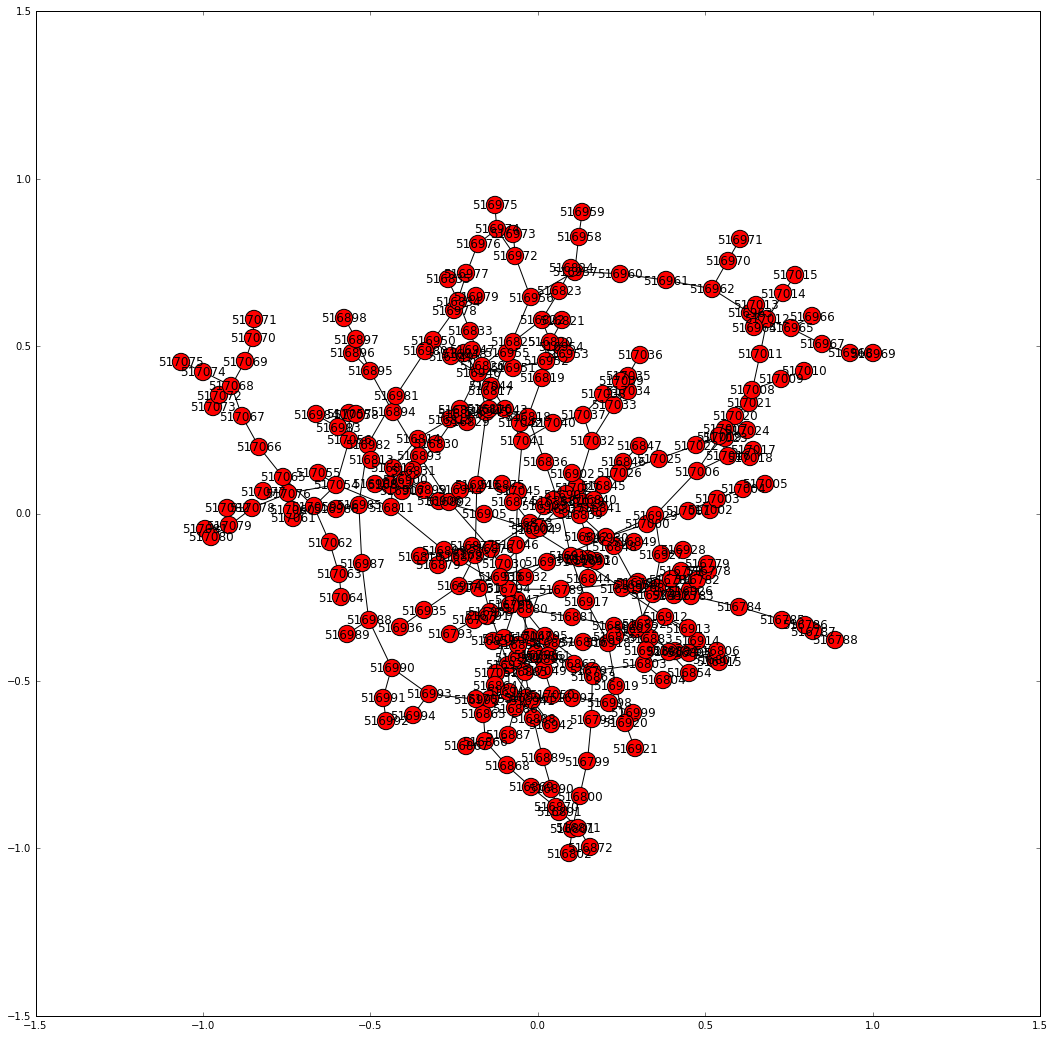

In [31]:
show_graph(516777)

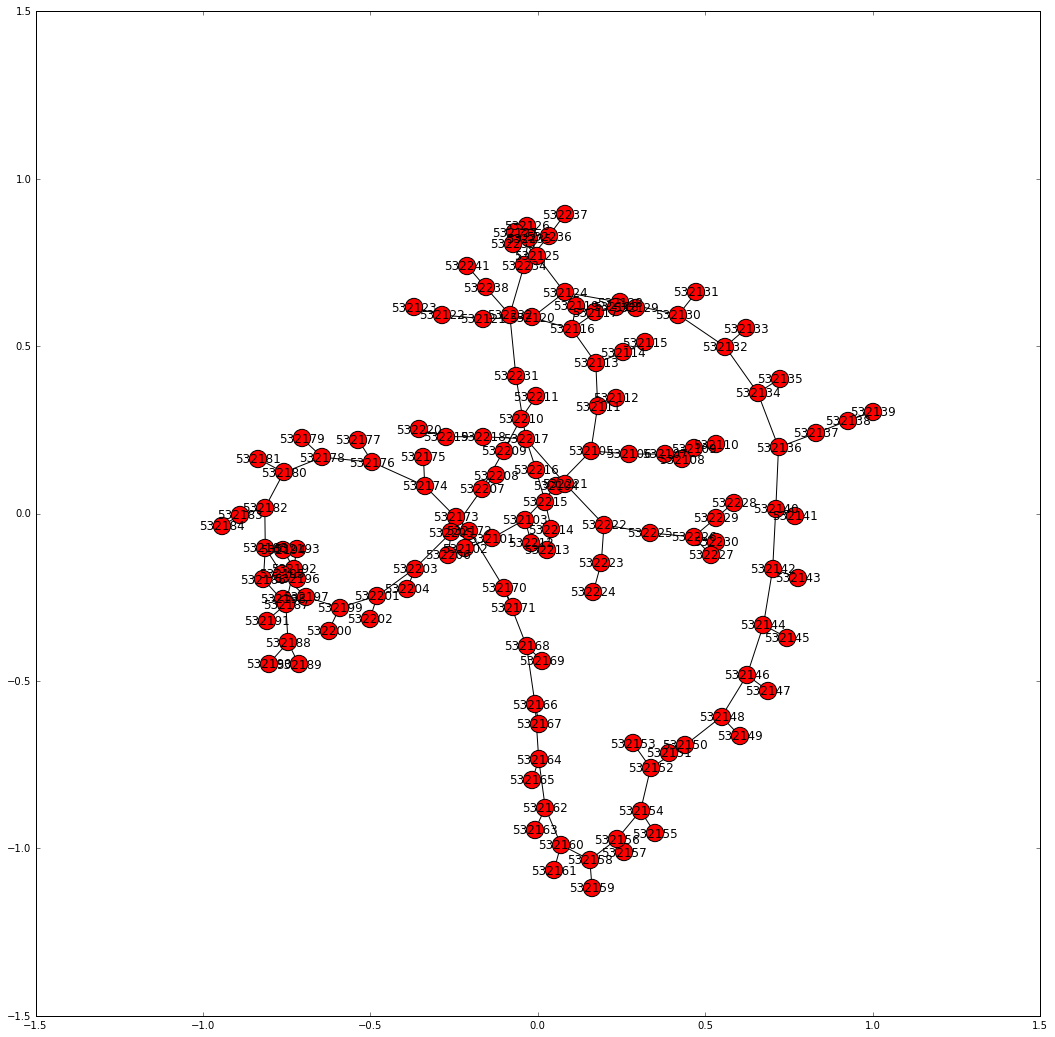

In [32]:
show_graph(532101)

These are not yet very informative visualizations.
Challenges to you:

1. replace node numbers by Hebrew text
1. Make a better graph layout 


# 5. Lexical stuff

In [33]:
focus_node = T.node_of('Mwanzo', 1, 1, lang='sw')
focus_node

1413645

In [34]:
word_nodes = L.d('word', focus_node)

In [35]:
word_nodes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [36]:
field_names = '''
    g_word
    sp
    pdp
    ls
    nametype
    language
    lex
'''.strip().split()
row_template = ('{}\t' * (len(field_names) - 1))+'{}\n'

In [38]:
# this cell is now obsolete, use the next cell
fh = outfile('first_words.tsv')
fh.write(row_template.format(*field_names))
for wn in word_nodes:
    fh.write(row_template.format(
        F.g_word.v(wn),
        F.sp.v(wn),
        F.pdp.v(wn),
        F.item['ls'].v(wn),
        F.nametype.v(wn),
        F.language.v(wn),
    ))
fh.close()

In [40]:
fh = outfile('first_words.tsv')
fh.write(row_template.format(*field_names))
for wn in word_nodes:
    fh.write(row_template.format(*[F.item[feat].v(wn) for feat in field_names]))
fh.close()

# 6. Clause atom relationship
Here we get the code feature for clause atoms.
We restrict ourselves to Genesis 1:3

In [9]:
focus_node = T.node_of('Mwanzo', 1, 3, lang='sw')
clauses = L.d('clause', focus_node)
for c in clauses:
    print(T.words(L.d('word', c)).replace('\n', ' '))    
    cas = L.d('clause_atom', c)
    for ca in cas:
        print('{} {}'.format(
            T.words(L.d('word', ca)).replace('\n', ' '), 
            F.code.v(ca),
        ))

וַיֹּ֥אמֶר אֱלֹהִ֖ים 
וַיֹּ֥אמֶר אֱלֹהִ֖ים  472
יְהִ֣י אֹ֑ור 
יְהִ֣י אֹ֑ור  999
וַֽיְהִי־אֹֽור׃ 
וַֽיְהִי־אֹֽור׃  200


Now generate a file with a line for each clause in the bible, and on each line the codes of its clause atoms. If the code is missing, print the value ``#``.

In [14]:
msg('Printing clause atom relationships')
cars = []
for c in F.otype.s('clause'):
    cars.append(','.join(F.code.v(ca) for ca in L.d('clause_atom', c)))
carstxt = '\n'.join(cars)
f = outfile('car.txt')
f.write('\n'.join(cars))
f.close()
msg('Done {} clauses.'.format(len(cars)))
if '#' in carstxt: msg('Some clause atoms have no code')
else: msg('All clause atoms have a code')

18m 57s Printing clause atom relationships
18m 59s Done 88011 clauses.
18m 59s All clause atoms have a code


In [15]:
nlines = 20
print('Showing first {} lines'.format(nlines))
sys.stdout.write('\n'.join(cars[0:nlines]))

Showing first 20 lines
0
422
402
460
472
999
200
200
527
200
200
427
200
200
107
200
999
411
200
477,223